Katılımcıların Genel Ortalamasının Aritmetik Ortalaması:  3.14 


Katılımcıların Genel Ortalamasının, Aritmetik Ortalamasının Standart Sapması:  0.443739520332325 


Verilen Cevapların Veri Tipleri: 
Ad                                     object
Soyad                                  object
Numara                                  int64
Bölümü İsteyerek mi Tercih Ettiniz     object
Genel Ortalama                        float64
Konyanın Ulaşım Yeterliliği            object
Konyanın Öğrenciler İçin Uygunluğu     object
Üniversite Hayatından Memnunluk         int64
Memleket                               object
dtype: object 


Katılımcıların Geldiklere Şehirlere Göre Gruplandırılması: 
Memleket
Adana        1
Ankara       5
Aydın        2
Balıkesir    1
Konya        6
Osmaniye     1
Tokat        1
İstanbul     4
Name: Ad, dtype: int64 


En Yüksek Not Ortalamasına Sahip Katılımcı: 3.71 


Bölümünü İsteyerek Tercih Edenlerin Ve İsteyerek Tercih Etmeyenlerin Not Ortalamasının Aritmetik Ortal

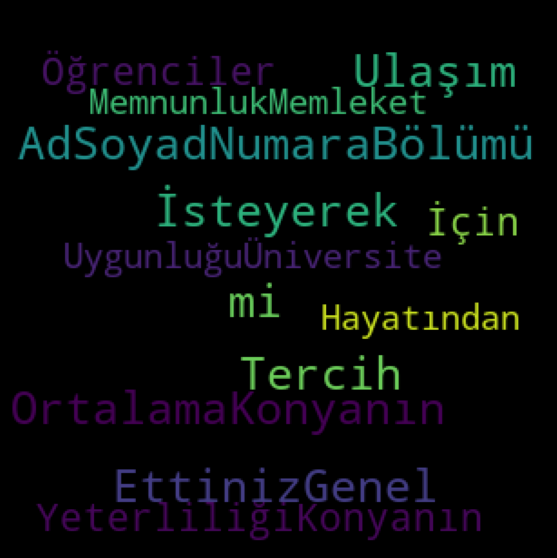

In [2]:
#VERİ GÖRSELLEŞTİRME

from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns

#WordCloud
text = ''.join(file)
wordcloud = WordCloud(width=300, height=300).generate(text)
plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<AxesSubplot:xlabel='Konyanın Öğrenciler İçin Uygunluğu', ylabel='Üniversite Hayatından Memnunluk'>

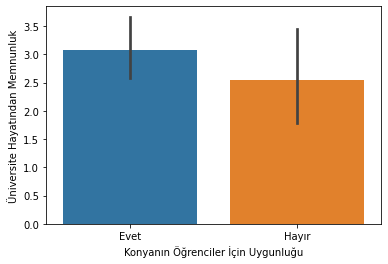

In [3]:
#BarPlot ile Konya'nın Maddi Anlamda Öğrenciler İçin Uygun Bir Şehir Olup Olmadığıyla Üniversite Hayatından Memnunluk Arasındaki İlişki
sns.barplot(x="Konyanın Öğrenciler İçin Uygunluğu", y="Üniversite Hayatından Memnunluk", data=file)

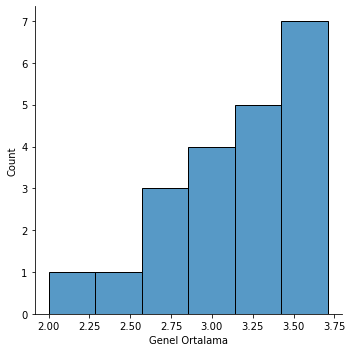

In [4]:
#DisPlot ile Katılımcıların Genel Not Ortalaması Dağılımları
sns.displot(file["Genel Ortalama"])

<AxesSubplot:xlabel='Üniversite Hayatından Memnunluk', ylabel='Genel Ortalama'>

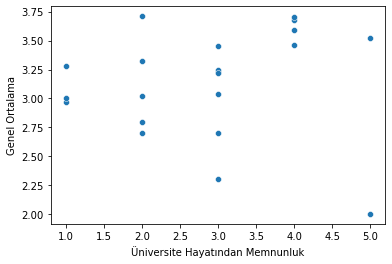

In [5]:
#ScatterPlot ile Üniversite Hayatından Memnunluk İle Genel Ortalama Arasındaki Korelasyon İlişkisi
sns.scatterplot(x="Üniversite Hayatından Memnunluk", y="Genel Ortalama", data=file,)

<AxesSubplot:xlabel='Bölümü İsteyerek mi Tercih Ettiniz', ylabel='Genel Ortalama'>

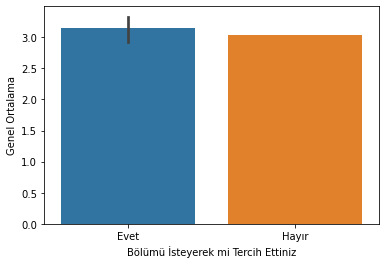

In [6]:
#BarPlot ile Bölümü İsteyerek Tercih Etme ile Not Ortalaması Arasındaki İlişki
sns.barplot(x="Bölümü İsteyerek mi Tercih Ettiniz", y="Genel Ortalama", data=file,)

Tüm verilerin regresyon modelinin intercept ve coefficient değeri: 
[3.056] [[0.0294]] 

Eğitim verilerinin regresyon modelinin intercept ve coefficient değeri: 
[2.85040936] [[0.11643275]] 

Test verilerinin regresyon modelinin intercept ve coefficient değeri: 
[5.53] [[-0.61]] 

Tüm Verilerden Elde edilen regresyon modeli: Y=[3.056]+[0.0294]X 

Eğitim Verilerinden Elde edilen regresyon modeli: Y=[2.85040936]+[0.11643275]X 

Test Verilerinden Elde edilen regresyon modeli: Y=[5.53]+[-0.61]X 

Elde edilen R^2 performans ölçütü:  0.0059724304715836896


Text(0.5, 1.0, 'Memnunluk-Ortalama Regresyon Analizi')

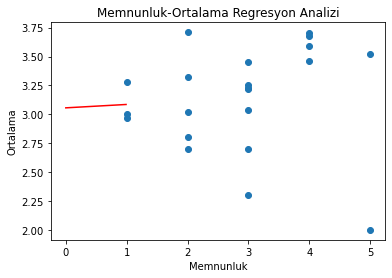

In [7]:
#REGRESYON ANALİZİ

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

memnunluk = file["Üniversite Hayatından Memnunluk"]
agno = file["Genel Ortalama"]

#veriler %85 e %15 eğitim ve test verileri olarak bölündü
memnunluk_egitim, memnunluk_test, agno_egitim, agno_test = train_test_split(memnunluk, agno, train_size=0.85, random_state=0)

lineer_regresyon = LinearRegression()
lineer_regresyon_egitim = LinearRegression()
lineer_regresyon_test = LinearRegression()

#Eğitim, test ve tüm değerler için ayrı ayrı regresyon modeli oluşturulması
lineer_regresyon.fit(memnunluk.values.reshape(-1,1),agno.values.reshape(-1,1))
lineer_regresyon_egitim.fit(memnunluk_egitim.values.reshape(-1,1),agno_egitim.values.reshape(-1,1))
lineer_regresyon_test.fit(memnunluk_test.values.reshape(-1,1),agno_test.values.reshape(-1,1))

#R^2 hesaplaması
r_2 = lineer_regresyon.score(memnunluk.values.reshape(-1,1),agno.values.reshape(-1,1))

print("Tüm verilerin regresyon modelinin intercept ve coefficient değeri: ")
print(lineer_regresyon.intercept_,lineer_regresyon.coef_,"\n")
print("Eğitim verilerinin regresyon modelinin intercept ve coefficient değeri: ")
print(lineer_regresyon_egitim.intercept_,lineer_regresyon_egitim.coef_,"\n")
print("Test verilerinin regresyon modelinin intercept ve coefficient değeri: ")
print(lineer_regresyon_test.intercept_,lineer_regresyon_test.coef_,"\n")

#Tüm verilerden elde edilen regresyon modeli
print("Tüm Verilerden Elde edilen regresyon modeli: Y={}+{}X".format(lineer_regresyon.intercept_,lineer_regresyon.coef_[0]),"\n")
print("Eğitim Verilerinden Elde edilen regresyon modeli: Y={}+{}X".format(lineer_regresyon_egitim.intercept_,lineer_regresyon_egitim.coef_[0]),"\n")
print("Test Verilerinden Elde edilen regresyon modeli: Y={}+{}X".format(lineer_regresyon_test.intercept_,lineer_regresyon_test.coef_[0]),"\n")
#R^2
print("Elde edilen R^2 performans ölçütü: ",r_2)

#Regresyon Grafiği
random_x = np.array([0, 0.5, 0.99])
plt.scatter(memnunluk.values, agno.values)
plt.plot(random_x,
         lineer_regresyon.intercept_[0] +
         lineer_regresyon.coef_[0][0] * random_x,
         color='red',
         label='Regresyon Grafiği')
plt.xlabel('Memnunluk')
plt.ylabel('Ortalama')
plt.title('Memnunluk-Ortalama Regresyon Analizi')
